In [36]:
# first import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from prophet import Prophet


warnings.filterwarnings('ignore')

In [37]:
!pip install opendatasets

In [38]:
# second get the data from kaggle
import opendatasets as od
with open('kaggle.json', 'w') as f:
    json.dump({"username":"shrouksayedahmed","key":"f0f058f800008a71ccddf954428e1742"}, f)

od.download('https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset')

Skipping, found downloaded files in "./gold-price-prediction-dataset" (use force=True to force download)


In [39]:
df = pd.read_csv('/content/gold-price-prediction-dataset/FINAL_USO.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [41]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [42]:
df=df[['Date','Close']]
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995
2011-12-20,156.979996
2011-12-21,157.160004


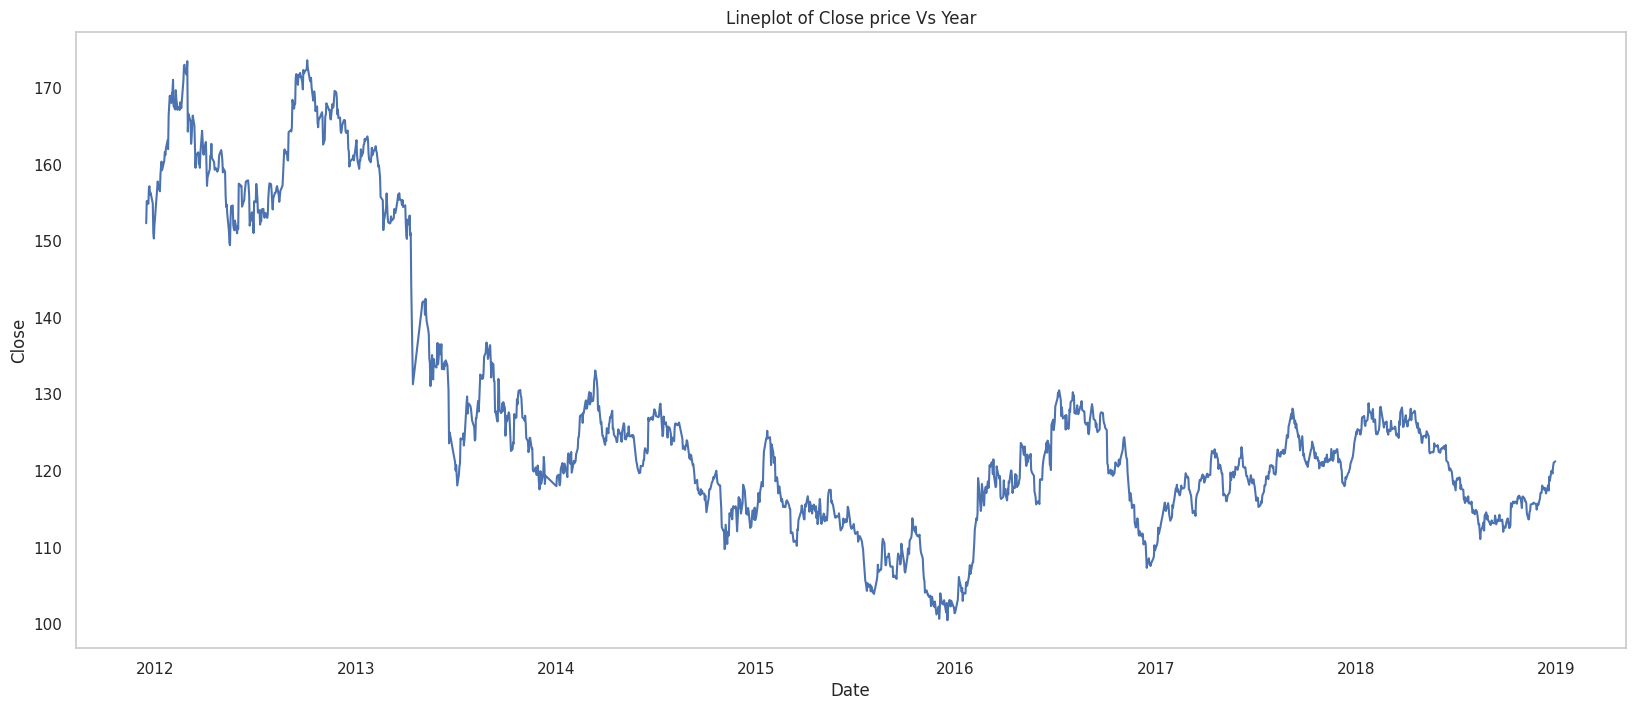

In [43]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df.index,y="Close",data=df)
plt.title(f'Lineplot of Close price Vs Year')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid()

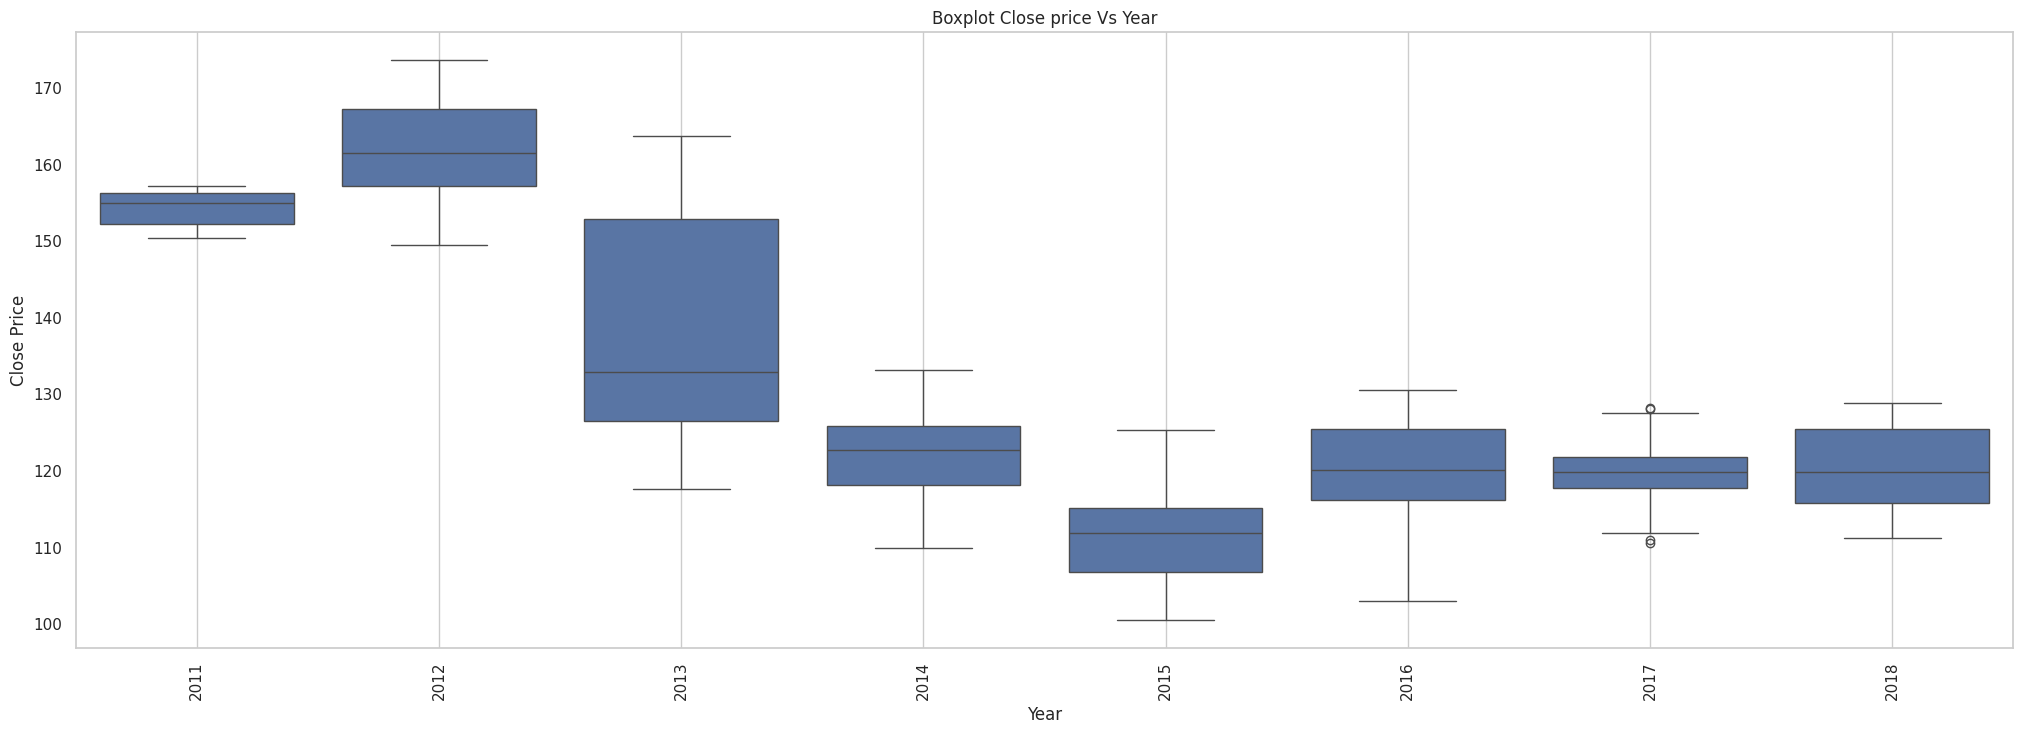

In [44]:
_, ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0],ax=ax)
plt.title('Boxplot Close price Vs Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.xticks(rotation=90)
plt.grid()

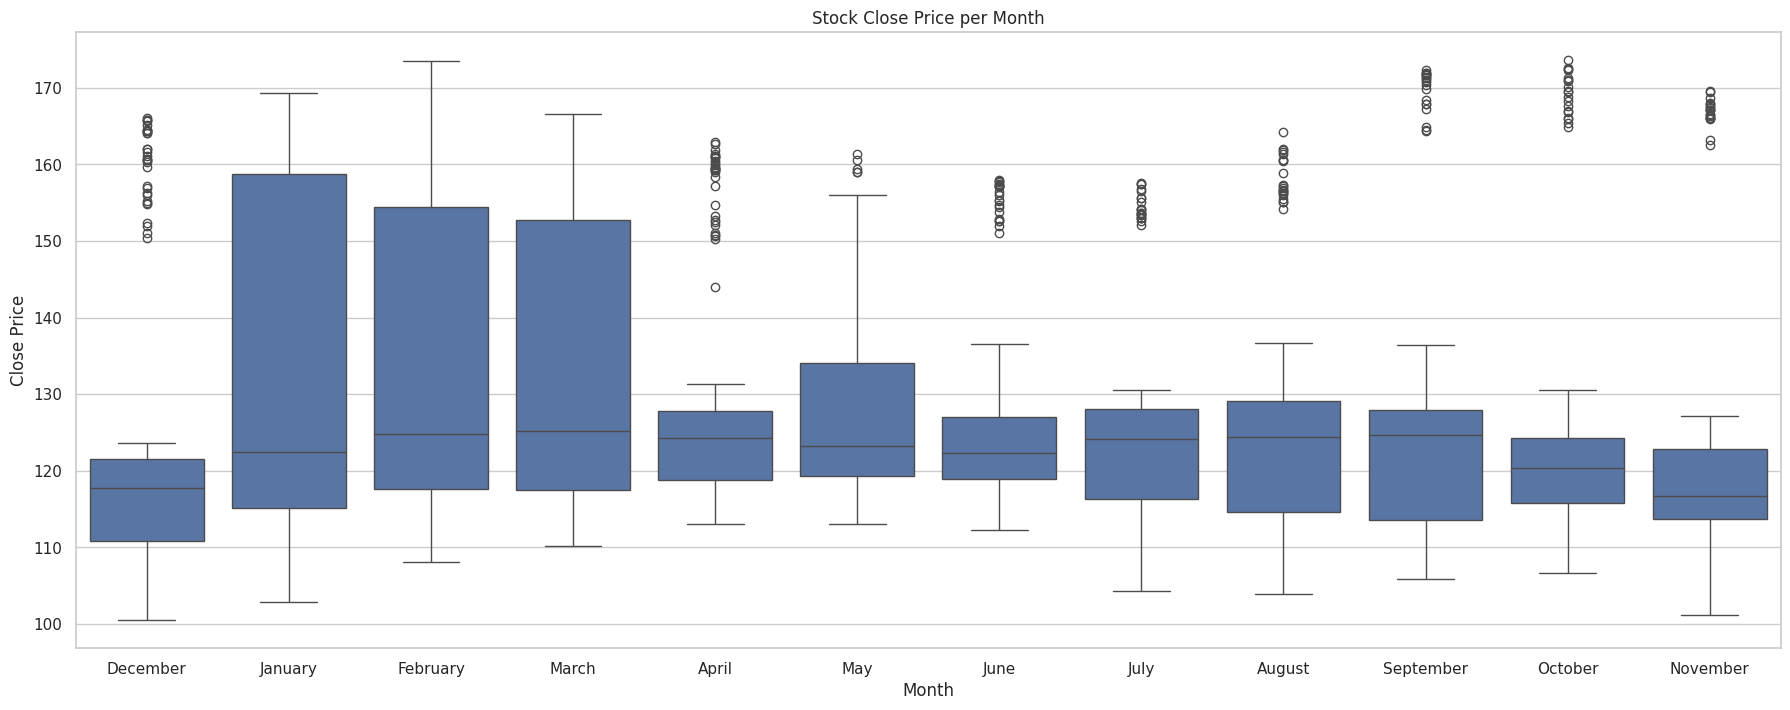

In [45]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y= df.values[:, 0],ax=ax)
plt.title('Stock Close Price per Month')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

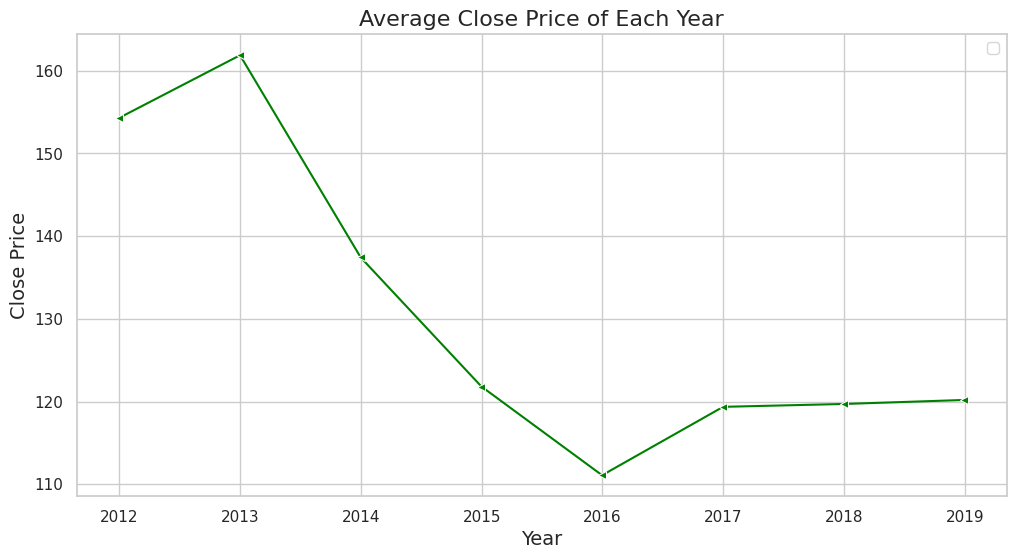

In [46]:
df_yearly_sum = df.resample('A').mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_yearly_sum.index, y='Close', data=df_yearly_sum, marker='<', color='green')
plt.title('Average Close Price of Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.show()

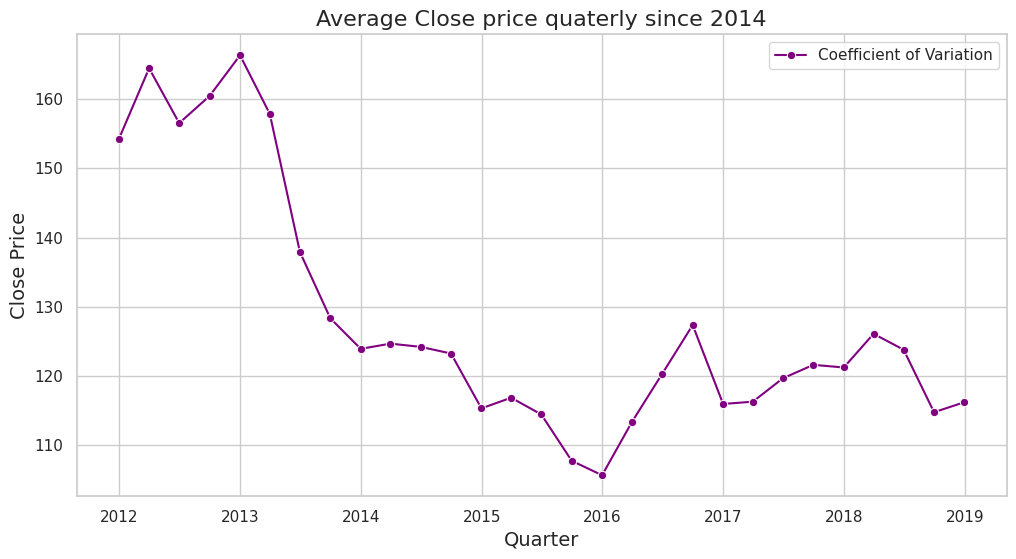

In [47]:
df_quaterly_sum=df.resample('Q').mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_quaterly_sum.index, y='Close', data=df_quaterly_sum, marker='o', color='purple', label='Coefficient of Variation')
plt.title('Average Close price quaterly since 2014', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.show()

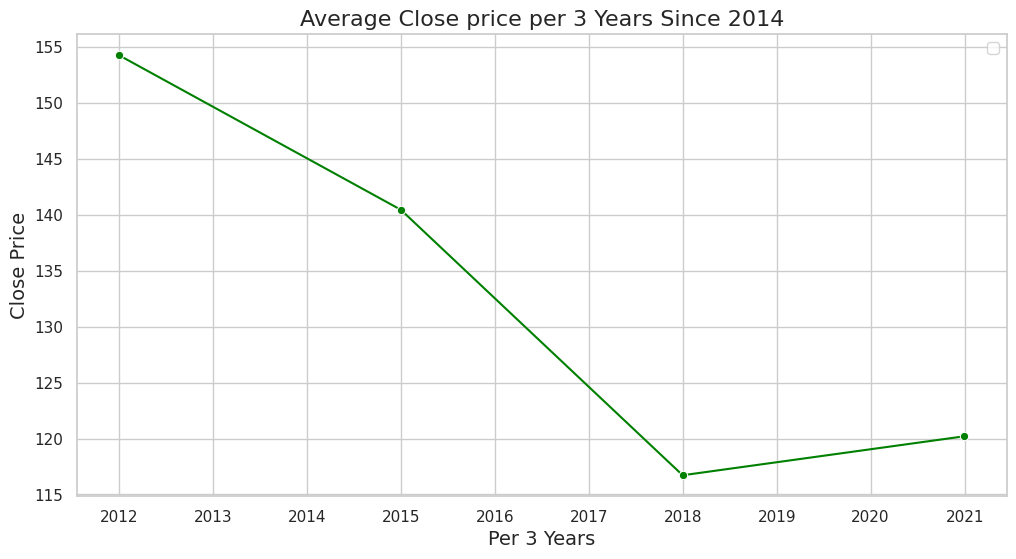

In [48]:
df_decade_sum=df.resample('3Y').mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_decade_sum.index, y='Close', data=df_decade_sum, marker='o', color='green')
plt.title('Average Close price per 3 Years Since 2014', fontsize=16)
plt.xlabel('Per 3 Years', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.show()

In [49]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Close':'Mean'})
df_1= df_1.merge(df.groupby(df.index.year).std().rename(columns={'Close':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct']=((df_1["Std"]/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
Date,,,
2011,154.289999,2.440942,1.58
2012,161.867429,6.065573,3.75
2013,137.429103,14.334819,10.43
2014,121.832898,5.007629,4.11
2015,111.107160,5.568863,5.01


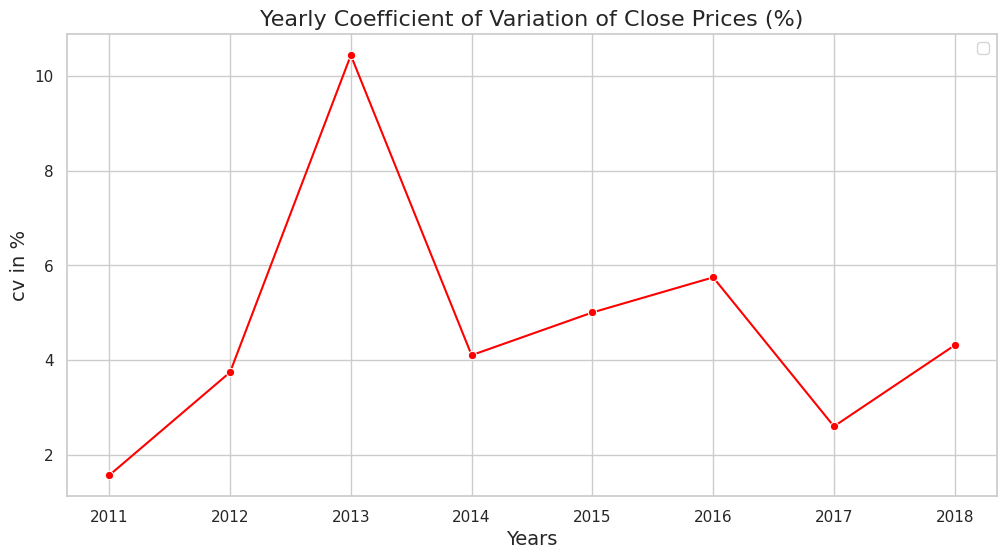

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_1.index, y='Cov_pct', data=df_1, marker='o', color='red')
plt.title('Yearly Coefficient of Variation of Close Prices (%)', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('cv in %', fontsize=14)
plt.legend()
plt.show()

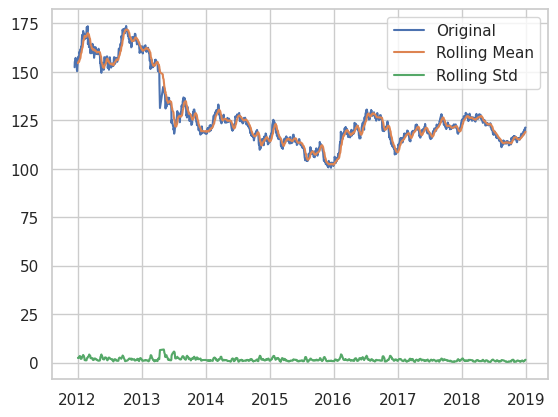

In [51]:
# transform the data from non stationary to stationary
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

# Plot the original time series along with rolling statistics
plt.plot(df, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()

In [52]:
test_result = adfuller(df['Close'])

def adfuller_test(sales):
    result= adfuller(sales)
    labels=['ADF Test Statistic','p-value', '#Lags Used', 'Number of Observaations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1]<=0.05:
            print('Data is Stationary')
        else:
            print('Data is not stationary')

adfuller_test(df['Close'])

ADF Test Statistic : -1.8234601291067782
Data is not stationary
p-value : 0.3688781538232954
Data is not stationary
#Lags Used : 1
Data is not stationary
Number of Observaations Used : 1716
Data is not stationary


In [53]:
stationary_df= df['Close'] - df['Close'].shift()
adfuller_test(stationary_df.dropna())

ADF Test Statistic : -31.12395376252256
Data is Stationary
p-value : 0.0
Data is Stationary
#Lags Used : 1
Data is Stationary
Number of Observaations Used : 1715
Data is Stationary


<Axes: xlabel='Date'>

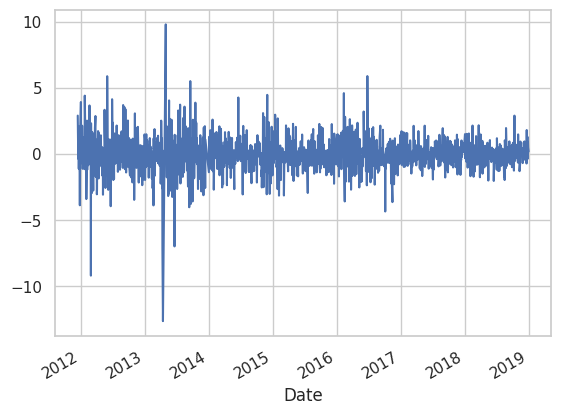

In [54]:
stationary_df.plot()


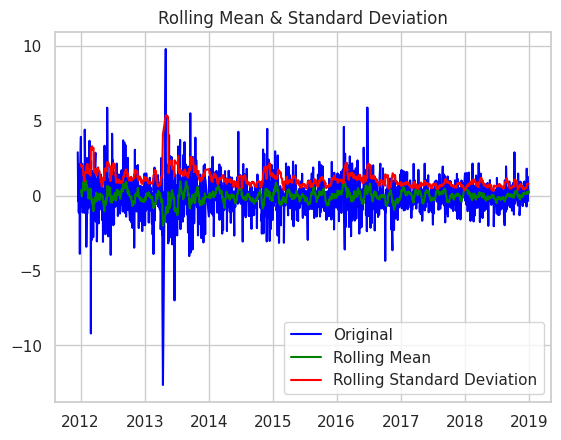

In [55]:
rolling_mean = stationary_df.rolling(window=12).mean()
rolling_std = stationary_df.rolling(window=12).std()

orig=plt.plot(stationary_df,color='blue', label='Original')
orig=plt.plot(rolling_mean,color='green', label='Rolling Mean')
orig=plt.plot(rolling_std,color='red', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

<Figure size 1200x600 with 0 Axes>

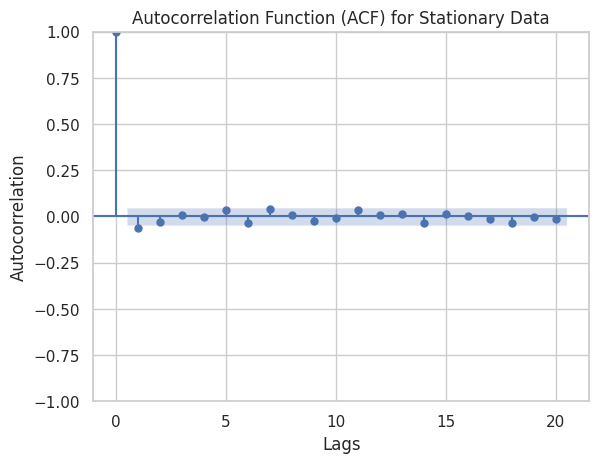

In [56]:
plt.figure(figsize=(12, 6))
plot_acf(stationary_df.dropna(), lags=20)
plt.title('Autocorrelation Function (ACF) for Stationary Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [57]:
train_size = int(len(stationary_df) * 0.8)
train_data, test_data = stationary_df.iloc[:train_size], stationary_df.iloc[train_size:]
print('Training set size:', len(train_data))
print('Testing set size:', len(test_data))

Training set size: 1374
Testing set size: 344


In [58]:
ma_model = ARIMA(train_data.dropna(), order=(0, 0, 1))
ma_model_fit = ma_model.fit()
print(ma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1373
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2361.115
Date:                Fri, 26 Sep 2025   AIC                           4728.231
Time:                        20:45:48   BIC                           4743.905
Sample:                             0   HQIC                          4734.096
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0221      0.036     -0.611      0.541      -0.093       0.049
ma.L1         -0.0615      0.012     -5.296      0.000      -0.084      -0.039
sigma2         1.8248      0.028     64.985      0.0

In [59]:
predictions = ma_model_fit.predict(start=len(train_data), end=len(df)-1)

mse = mean_squared_error(test_data.dropna(), predictions.dropna())
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.5505227126514857
Root Mean Squared Error (RMSE): 0.7419721778149675


In [60]:
ar_model = ARIMA(train_data.dropna(), order=(1, 0, 0))
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1373
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2361.284
Date:                Fri, 26 Sep 2025   AIC                           4728.569
Time:                        20:45:48   BIC                           4744.243
Sample:                             0   HQIC                          4734.434
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0221      0.036     -0.606      0.544      -0.093       0.049
ar.L1         -0.0573      0.012     -4.788      0.000      -0.081      -0.034
sigma2         1.8252      0.028     64.938      0.0

In [61]:
predictions = ar_model_fit.predict(start=len(train_data), end=len(df)-1)

mse = mean_squared_error(test_data.dropna(), predictions.dropna())
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.5505102476869391
Root Mean Squared Error (RMSE): 0.7419637778806585


In [62]:
arma_model = ARIMA(train_data.dropna(), order=(1, 0, 1))
arma_model_fit = arma_model.fit()
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1373
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2360.656
Date:                Fri, 26 Sep 2025   AIC                           4729.313
Time:                        20:45:51   BIC                           4750.212
Sample:                             0   HQIC                          4737.133
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0222      0.036     -0.626      0.531      -0.092       0.047
ar.L1          0.2950      0.363      0.812      0.417      -0.417       1.007
ma.L1         -0.3571      0.355     -1.006      0.3

In [63]:
predictions = arma_model_fit.predict(start=len(train_data), end=len(df)-1)

mse = mean_squared_error(test_data.dropna(), predictions.dropna())
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.5505871518408214
Root Mean Squared Error (RMSE): 0.7420156008068978


In [64]:
arima_model = ARIMA(train_data.dropna(), order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1373
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2363.732
Date:                Fri, 26 Sep 2025   AIC                           4733.465
Time:                        20:45:55   BIC                           4749.137
Sample:                             0   HQIC                          4739.329
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.012     -4.705      0.000      -0.080      -0.033
ma.L1         -0.9999      0.111     -8.970      0.000      -1.218      -0.781
sigma2         1.8266      0.202      9.061      0.0

In [65]:
predictions = arima_model_fit.predict(start=len(train_data), end=len(df)-1)

mse = mean_squared_error(test_data.dropna(), predictions.dropna())
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.5505098062250998
Root Mean Squared Error (RMSE): 0.7419634803850522


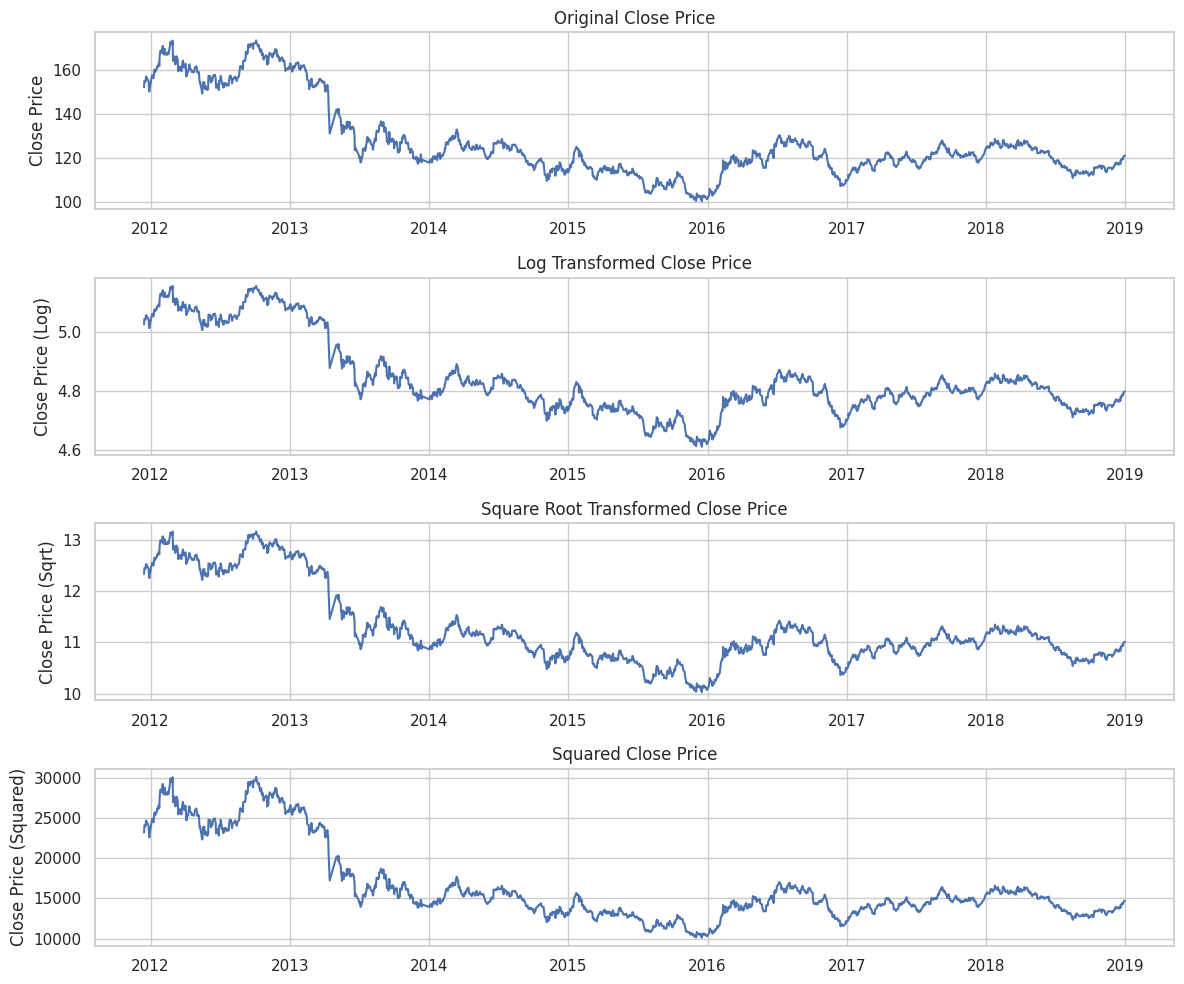

In [66]:
df['Close_log'] = np.log(df['Close'])
df['Close_sqrt'] = np.sqrt(df['Close'])
df['Close_squared'] = np.square(df['Close'])

fig, axes = plt.subplots(4, 1, figsize=(12, 10))

axes[0].plot(df.index, df['Close'])
axes[0].set_title('Original Close Price')
axes[0].set_ylabel('Close Price')

axes[1].plot(df.index, df['Close_log'])
axes[1].set_title('Log Transformed Close Price')
axes[1].set_ylabel('Close Price (Log)')

axes[2].plot(df.index, df['Close_sqrt'])
axes[2].set_title('Square Root Transformed Close Price')
axes[2].set_ylabel('Close Price (Sqrt)')

axes[3].plot(df.index, df['Close_squared'])
axes[3].set_title('Squared Close Price')
axes[3].set_ylabel('Close Price (Squared)')

plt.tight_layout()
plt.show()

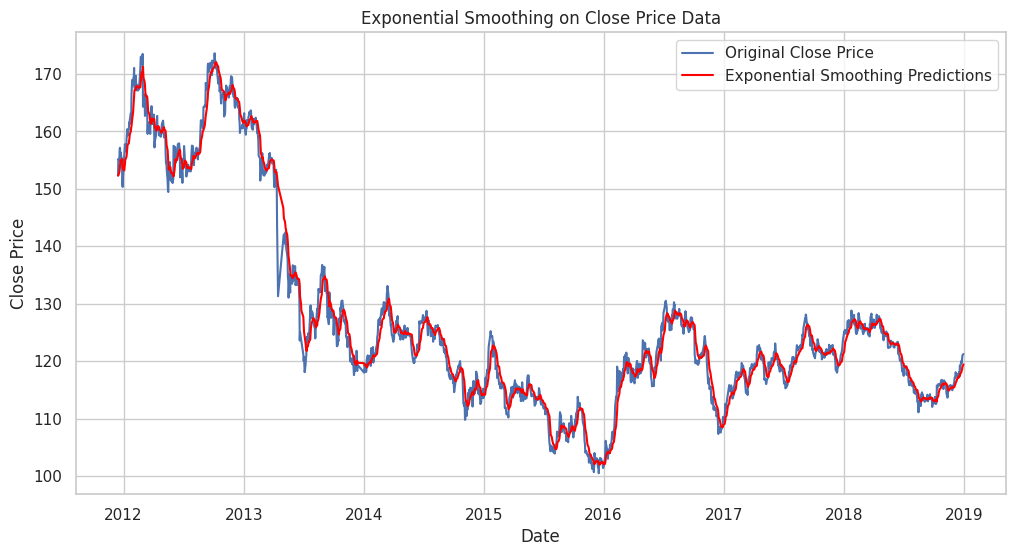

In [67]:
exp_smoothing_model = SimpleExpSmoothing(df['Close'])
exp_smoothing_fit = exp_smoothing_model.fit(smoothing_level=0.2)
exp_smoothing_predictions = exp_smoothing_fit.predict(start=df.index[0], end=df.index[-1])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Original Close Price')
plt.plot(df.index, exp_smoothing_predictions, label='Exponential Smoothing Predictions', color='red')
plt.title('Exponential Smoothing on Close Price Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

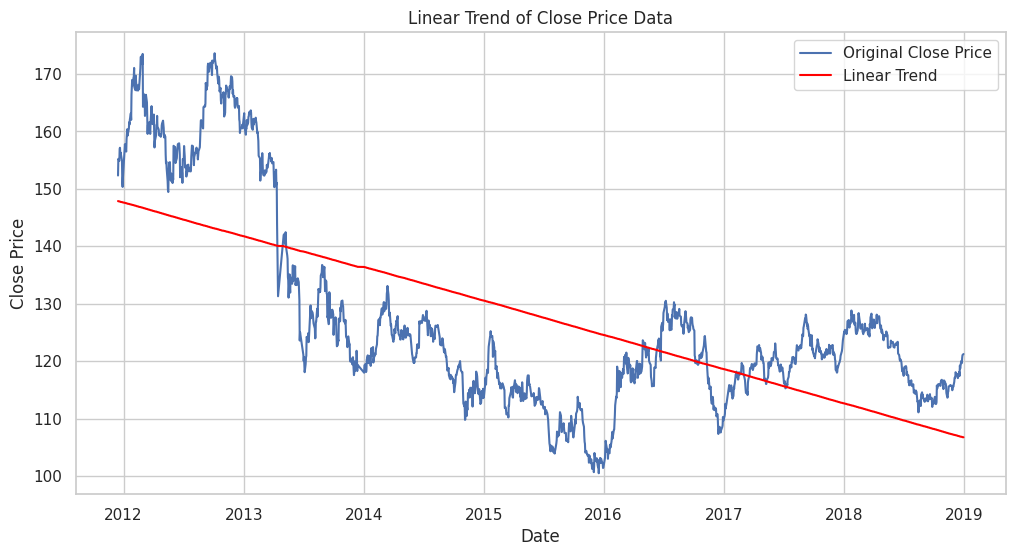

Slope: -0.0239
Intercept: 147.8772
R-value: -0.6774
P-value: 0.0000
Standard Error: 0.0006
The linear trend is statistically significant.
The linear trend is downward.


In [68]:
linear_df = pd.DataFrame({'time_index': np.arange(len(df)), 'Close': df['Close'].values})

slope, intercept, r_value, p_value, std_err = linregress(linear_df['time_index'], linear_df['Close'])

linear_df['predicted_close'] = intercept + slope * linear_df['time_index']

plt.figure(figsize=(12, 6))
plt.plot(df.index, linear_df['Close'], label='Original Close Price')
plt.plot(df.index, linear_df['predicted_close'], color='red', label='Linear Trend')
plt.title('Linear Trend of Close Price Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.4f}')
print(f'R-value: {r_value:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'Standard Error: {std_err:.4f}')

if p_value < 0.05:
    print('The linear trend is statistically significant.')
else:
    print('The linear trend is not statistically significant.')

if slope > 0:
    print('The linear trend is upward.')
elif slope < 0:
    print('The linear trend is downward.')
else:
    print('There is no linear trend.')

In [69]:
sarima_model = ARIMA(train_data.dropna(), order=(1, 1, 1))
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1373
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2363.732
Date:                Fri, 26 Sep 2025   AIC                           4733.465
Time:                        20:46:05   BIC                           4749.137
Sample:                             0   HQIC                          4739.329
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.012     -4.705      0.000      -0.080      -0.033
ma.L1         -0.9999      0.111     -8.970      0.000      -1.218      -0.781
sigma2         1.8266      0.202      9.061      0.0

In [70]:
predictions = sarima_model_fit.predict(start=len(train_data), end=len(df)-1)

mse = mean_squared_error(test_data.dropna(), predictions.dropna())
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.5505098062250998
Root Mean Squared Error (RMSE): 0.7419634803850522


In [71]:
prophet_df = df.copy()
prophet_df = prophet_df.reset_index()
prophet_df = prophet_df[['Date', 'Close']]
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
display(prophet_df.head())

,ds,y
0,2011-12-15,152.330002
1,2011-12-16,155.229996
2,2011-12-19,154.869995
3,2011-12-20,156.979996
4,2011-12-21,157.160004


In [72]:
prophet_model = Prophet()
prophet_model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6an1cvxb/dc5drhc5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6an1cvxb/o07dchas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79482', 'data', 'file=/tmp/tmp6an1cvxb/dc5drhc5.json', 'init=/tmp/tmp6an1cvxb/o07dchas.json', 'output', 'file=/tmp/tmp6an1cvxb/prophet_modelomc8fym5/prophet_model-20250926204609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:46:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:46:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
future_dates = prophet_model.make_future_dataframe(periods=365)
prophet_predictions = prophet_model.predict(future_dates)
display(prophet_predictions.head())
display(prophet_predictions.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-12-15,160.228489,154.757564,162.596463,160.228489,160.228489,-1.574173,-1.574173,-1.574173,1.815567,1.815567,1.815567,-3.389739,-3.389739,-3.389739,0.0,0.0,0.0,158.654317
1,2011-12-16,160.186553,154.668688,162.289676,160.186553,160.186553,-1.601318,-1.601318,-1.601318,1.864247,1.864247,1.864247,-3.465565,-3.465565,-3.465565,0.0,0.0,0.0,158.585235
2,2011-12-19,160.060746,154.283802,162.058400,160.060746,160.060746,-1.840809,-1.840809,-1.840809,1.820316,1.820316,1.820316,-3.661125,-3.661125,-3.661125,0.0,0.0,0.0,158.219937
3,2011-12-20,160.018810,154.495098,161.928940,160.018810,160.018810,-1.917514,-1.917514,-1.917514,1.789965,1.789965,1.789965,-3.707479,-3.707479,-3.707479,0.0,0.0,0.0,158.101295
4,2011-12-21,159.976874,154.002737,161.817318,159.976874,159.976874,-1.958550,-1.958550,-1.958550,1.781955,1.781955,1.781955,-3.740505,-3.740505,-3.740505,0.0,0.0,0.0,158.018324


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2078,2019-12-27,110.405169,75.485240,143.335184,77.512239,145.273712,-1.692644,-1.692644,-1.692644,1.864247,1.864247,1.864247,-3.556891,-3.556891,-3.556891,0.0,0.0,0.0,108.712525
2079,2019-12-28,110.390769,68.501284,137.429532,77.342455,145.548344,-7.987685,-7.987685,-7.987685,-4.536026,-4.536026,-4.536026,-3.451659,-3.451659,-3.451659,0.0,0.0,0.0,102.403084
2080,2019-12-29,110.376369,69.054649,138.430228,77.172671,145.819525,-7.859992,-7.859992,-7.859992,-4.536024,-4.536024,-4.536024,-3.323968,-3.323968,-3.323968,0.0,0.0,0.0,102.516377
2081,2019-12-30,110.361969,76.377162,146.079706,77.010805,146.071435,-1.353880,-1.353880,-1.353880,1.820316,1.820316,1.820316,-3.174196,-3.174196,-3.174196,0.0,0.0,0.0,109.008089
2082,2019-12-31,110.347569,75.665151,144.668281,76.897501,146.172217,-1.213103,-1.213103,-1.213103,1.789965,1.789965,1.789965,-3.003068,-3.003068,-3.003068,0.0,0.0,0.0,109.134466


In [74]:
merged_df = pd.merge(prophet_df, prophet_predictions[['ds', 'yhat']], on='ds', how='left')

mse = mean_squared_error(merged_df['y'].dropna(), merged_df['yhat'].dropna())
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 9.043189529172789
Root Mean Squared Error (RMSE): 3.007189639708941


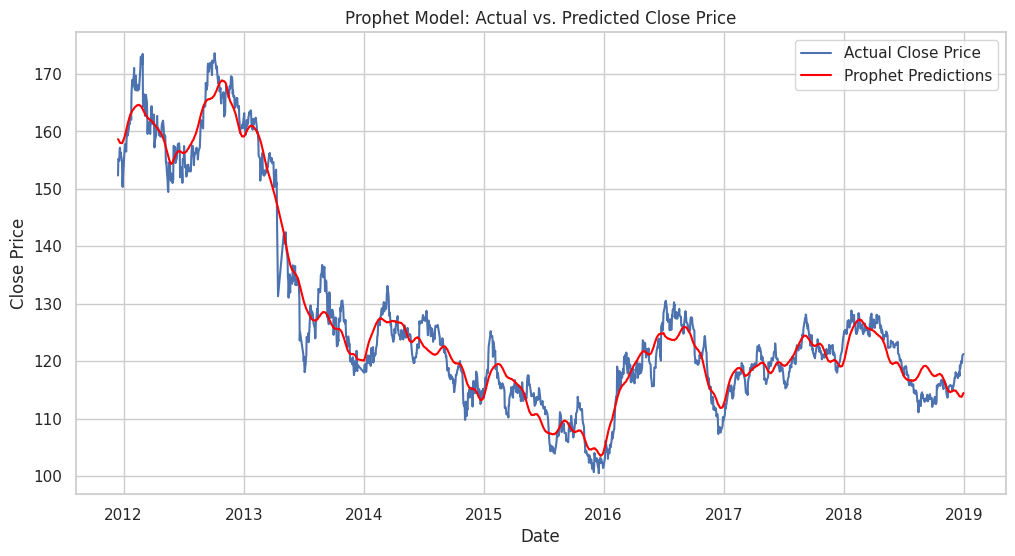

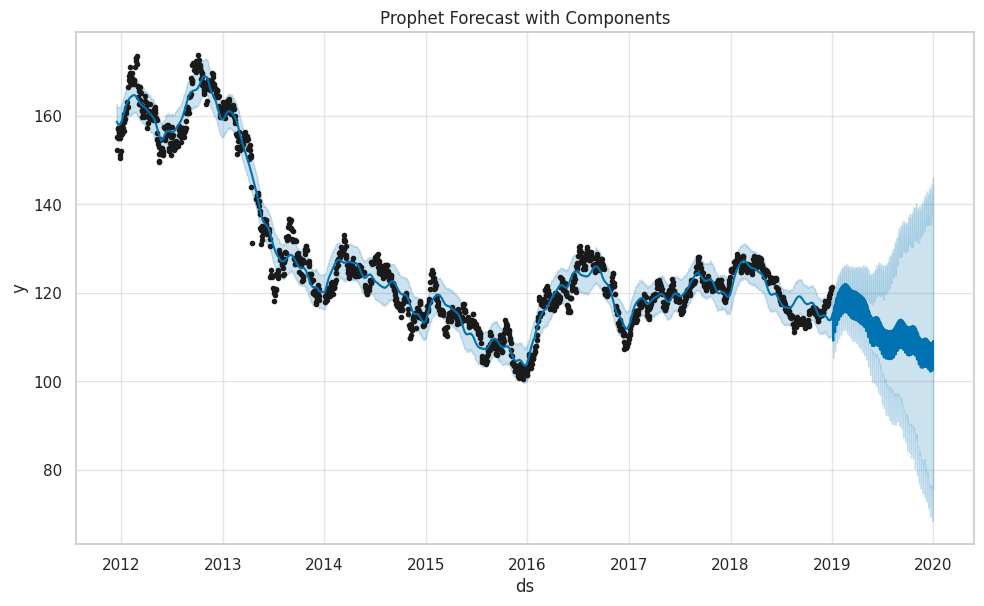

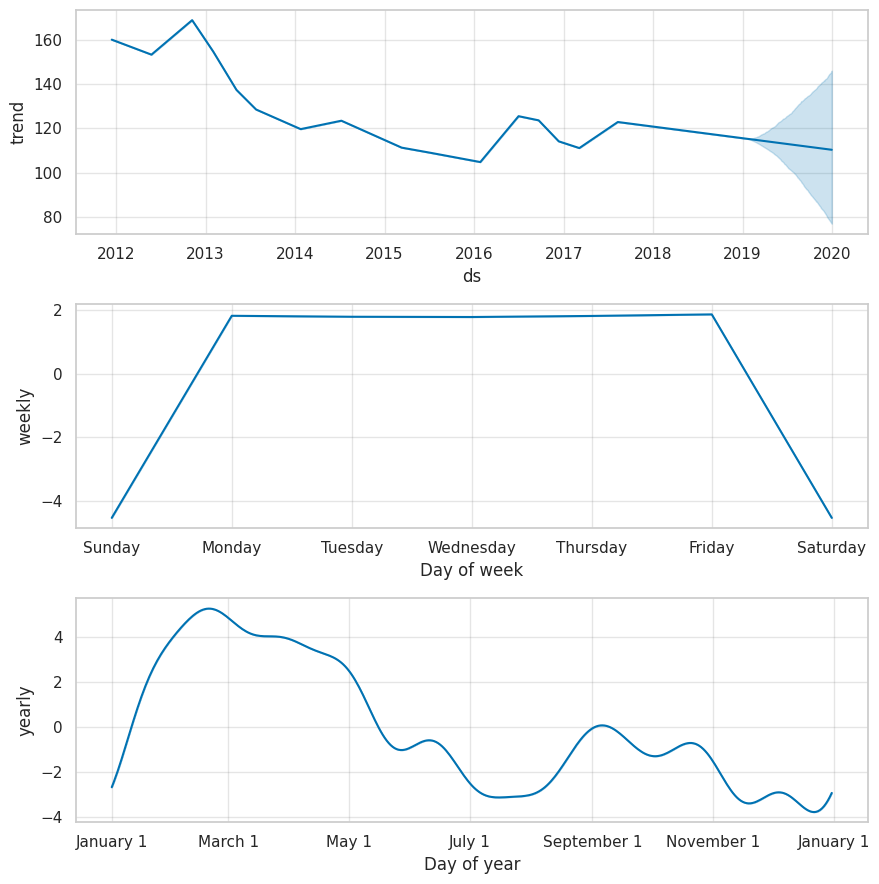

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], merged_df['y'], label='Actual Close Price')
plt.plot(merged_df['ds'], merged_df['yhat'], label='Prophet Predictions', color='red')
plt.title('Prophet Model: Actual vs. Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

prophet_model.plot(prophet_predictions)
plt.title('Prophet Forecast with Components')
plt.show()

prophet_model.plot_components(prophet_predictions)
plt.show()